In [1]:
import matplotlib.pyplot as pyplot
import numpy as np

In [375]:
x = np.arange(15, 25.5, step=1)

In [376]:
x, len(x)

(array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]), 11)

In [377]:
y = np.linspace(0, 100, num=len(x))
y[np.where(x==15)[0][0]] = 0
y[np.where(x==16)[0][0]] = 0
y[np.where(x==17)[0][0]] = 5
y[np.where(x==18)[0][0]] = 17
y[np.where(x==19)[0][0]] = 22
y[np.where(x==20)[0][0]] = 27
y[np.where(x==21)[0][0]] = 43
y[np.where(x==22)[0][0]] = 55
y[np.where(x==23)[0][0]] = 68
y[np.where(x==24)[0][0]] = 77
y[np.where(x==25)[0][0]] = 100

In [378]:
y, len(y)

(array([  0.,   0.,   5.,  17.,  22.,  27.,  43.,  55.,  68.,  77., 100.]), 11)

In [379]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

[15.] [  1.  15. 225.]
2.5196662375635954
0.9938592553694314


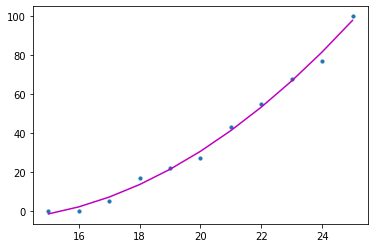

In [383]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
print(x[0], x_poly[0])
model = LinearRegression(fit_intercept=False)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [384]:
model.coef_

array([[112.36363636, -18.11981352,   0.7016317 ]])

In [385]:
model.intercept_

0.0

In [386]:
def f(a):
    result = model.coef_[0,0]*np.power(a, 0)
    s1 = "%f "%(model.coef_[0,0])
    s2 = "%f "%(model.coef_[0,0])
    for i in range(1, len(model.coef_[0])):
        result += model.coef_[0,i]*np.power(a, i)
        if model.coef_[0,i] > 0:
            s1 += "+"
            s2 += "+"
        
        s1 += "%f * x^%d "%(model.coef_[0,i], i)
        s2 += "%f * pow(x, %d) "%(model.coef_[0,i], i)
    print("%s"%(s1))
    print("//#define REACTION(x) (%s)"%(s2))
    return result

In [387]:
t = np.arange(0, 35, step=1)

112.363636 -18.119814 * x^1 +0.701632 * x^2 
//#define REACTION(x) (112.363636 -18.119814 * pow(x, 1) +0.701632 * pow(x, 2) )


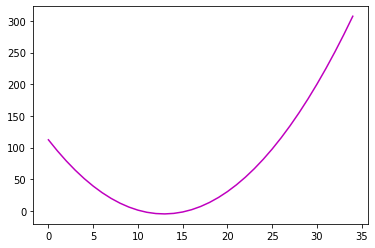

In [388]:
plt.plot(t, f(t), color='m')